In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('train (copy).csv')
train_data = data.columns.drop(['shares','url', 'timedelta'])
 
# print(train_data.values.tolist())
data = data[data.shares < 170000]
data = data.iloc[:, 1:]

print(data.shape)
data.head()
# train_ans.head()

(31698, 60)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,630.0,12.0,363.0,0.571823,1.0,0.773585,5.0,3.0,1.0,1.0,...,0.033333,1.0,-0.250000,-0.4,-0.150000,0.571429,0.357143,0.071429,0.357143,5100
1,230.0,11.0,502.0,0.591919,1.0,0.777778,6.0,1.0,2.0,0.0,...,0.100000,0.8,-0.304167,-0.7,-0.050000,0.000000,0.000000,0.500000,0.000000,3100
2,714.0,6.0,951.0,0.433761,1.0,0.658635,22.0,19.0,1.0,0.0,...,0.062500,1.0,-0.317357,-1.0,-0.050000,0.000000,0.000000,0.500000,0.000000,1300
3,151.0,9.0,496.0,0.569072,1.0,0.712934,10.0,3.0,1.0,0.0,...,0.050000,0.6,-0.188542,-0.4,-0.050000,0.000000,0.000000,0.500000,0.000000,1400
4,727.0,8.0,148.0,0.721088,1.0,0.865979,6.0,2.0,0.0,1.0,...,0.033333,1.0,-0.116667,-0.2,-0.033333,0.750000,0.800000,0.250000,0.800000,1000


## Uma variavel

In [5]:
# Collecting X and Y
X = data['kw_avg_avg'].values
Y = data['shares'].values

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

0.8531431187883083 523.4976692871028


(1000,)


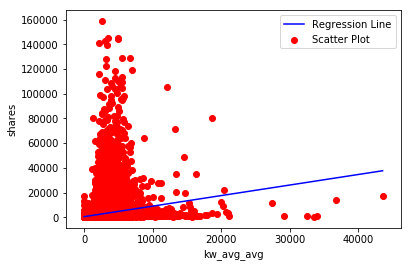

In [7]:
# Plotting Values and Regression Line

max_x = np.max(X)
min_x = np.min(X)

# Calculating line values x and y
#faz alguma coisa
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x
print(x.shape)
# Ploting Line
plt.plot(x, y, color='b', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='r', label='Scatter Plot')

plt.xlabel('kw_avg_avg')
plt.ylabel('shares')
plt.legend()
plt.show()

In [4]:
error = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    error += abs(Y[i] - y_pred)
error = error/m
print(error)

2796.2951154753273


## Duas Features

In [5]:
features = ['kw_avg_avg', 'LDA_04']
# features = train_data.values.tolist()

x0 = np.ones(m, dtype=np.float64)

#Tirar essa linha caso queira mostrar sem NORMALIZAR
data = ((data - data.mean()) / data.mean())
print(data.shape)

X = np.concatenate((np.array([x0], dtype=np.float64).T, data[features].values), axis=1)
# X = np.concatenate((np.array([x0], dtype=np.float64).T, data[features].values), axis=1)

Y = data['shares'].values

B = np.zeros([len(features)+1], dtype=np.float64)

print(x0.shape)
print(X.shape)
print(Y)
print(B.shape)

# alpha = 0.000000001
alpha = 0.01

(31698, 60)
(31698,)
(31698, 3)
[ 0.59518196 -0.03037959 -0.59338499 ...  0.65773812  3.66043358
 -0.34316037]
(3,)


In [6]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [7]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

2.344981551671403


In [8]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
#         print(cost)
        
    return B, cost_history

In [9]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 1000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[ 1.87690162e-15  6.86265612e-01 -4.61069580e-03]
2.2857772406035384


In [10]:
print(Y)

[ 0.59518196 -0.03037959 -0.59338499 ...  0.65773812  3.66043358
 -0.34316037]


In [11]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(Y)
print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

[ 0.59518196 -0.03037959 -0.59338499 ...  0.65773812  3.66043358
 -0.34316037]
2.138119379549955
0.025247239589433645


## Normal Equation

In [163]:
def get_best_param(X, y):  
    X_transpose = X.T  
    best_params = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)  
    # normal equation  
    # theta_best = (X.T * X)^(-1) * X.T * y  
      
    return best_params # returns a list  

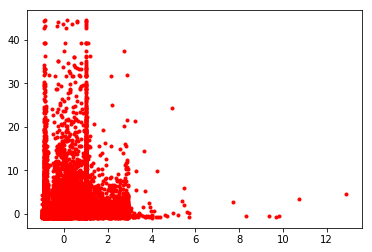

In [164]:
plt.plot(X, Y, "r.")  

In [174]:
params = get_best_param(X, Y)
params

array([2.21524188e-15, 8.41470330e-01, 5.23764564e-03])